In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import re
import seaborn as sns

import nltk
from nltk import sent_tokenize, word_tokenize, everygrams
from nltk.corpus import stopwords
nltk.download('stopwords')
#from nltk.sentiment.vader import SentimentIntensityAnalyzer

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from collections import Counter

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bokr4002\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
filenames, file_contents, year, month, location = [],[],[],[],[]

for filename in os.listdir("../data/Donald Trump Rally Speeches"):
    filenames.append(filename)

    with open(f"../data/Donald Trump Rally Speeches/{filename}", encoding= "utf-8") as file:
        file_contents.append(file.read())
    
    year.append(filename[-8:-4])
    x = re.search("([A-z]+)([A-z]{3})([0-9]+)\_", filename)
    month.append(x.group(2))
    location.append(''.join(map(lambda x: x if x.islower() else " "+x, x.group(1))))    
    
df = pd.DataFrame({
    'Location': location,
    'Month': month,
    'Year':year,
    'filename':filenames,
    'content': file_contents
})

<>:10: SyntaxWarning: invalid escape sequence '\_'
<>:10: SyntaxWarning: invalid escape sequence '\_'
C:\Users\bokr4002\AppData\Local\Temp\2\ipykernel_33676\3555183861.py:10: SyntaxWarning: invalid escape sequence '\_'
  x = re.search("([A-z]+)([A-z]{3})([0-9]+)\_", filename)


In [3]:
df.head()

,Location,Month,Year,filename,content
0,Battle Creek,Dec,2019,BattleCreekDec19_2019.txt,Thank you. Thank you. Thank you to Vice Presid...
1,Bemidji,Sep,2020,BemidjiSep18_2020.txt,There's a lot of people. That's great. Thank y...
2,Charleston,Feb,2020,CharlestonFeb28_2020.txt,Thank you. Thank you. Thank you. All I can say...
3,Charlotte,Mar,2020,CharlotteMar2_2020.txt,"I want to thank you very much. North Carolina,..."
4,Cincinnati,Aug,2019,CincinnatiAug1_2019.txt,Thank you all. Thank you very much. Thank you ...


In [4]:
df.describe

<bound method NDFrame.describe of               Location Month  Year                        filename  \
0         Battle Creek   Dec  2019       BattleCreekDec19_2019.txt   
1              Bemidji   Sep  2020           BemidjiSep18_2020.txt   
2           Charleston   Feb  2020        CharlestonFeb28_2020.txt   
3            Charlotte   Mar  2020          CharlotteMar2_2020.txt   
4           Cincinnati   Aug  2019         CincinnatiAug1_2019.txt   
5    Colorador Springs   Feb  2020  ColoradorSpringsFeb20_2020.txt   
6               Dallas   Oct  2019            DallasOct17_2019.txt   
7           Des Moines   Jan  2020         DesMoinesJan30_2020.txt   
8         Fayetteville   Sep  2020      FayettevilleSep19_2020.txt   
9         Fayetteville   Sep  2019       FayettevilleSep9_2019.txt   
10            Freeland   Sep  2020          FreelandSep10_2020.txt   
11          Greenville   Jul  2019        GreenvilleJul17_2019.txt   
12           Henderson   Sep  2020         HendersonSep1

In [5]:
# Storing the dataframe for use in other notebooks
DT_rally_speaches_dataset = df
%store DT_rally_speaches_dataset

Stored 'DT_rally_speaches_dataset' (DataFrame)


## Most commonly used words

In [6]:
nltk.download('punkt')
nltk.download('punkt_tab')
custom_stopwords = stopwords.words('english')
custom_stopwords.append('going') # filtering out going along with the the stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bokr4002\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\bokr4002\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


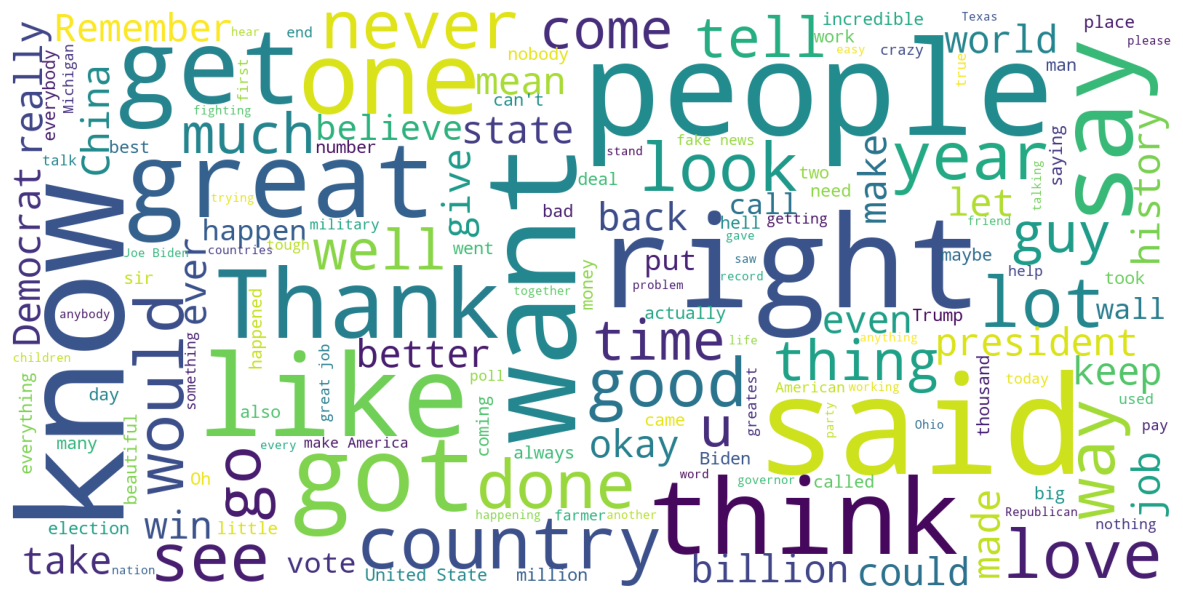

In [7]:
text = " ".join(content for content in df.content)

wordcloud = WordCloud(stopwords=custom_stopwords, scale=4, max_font_size=50, background_color="white").generate(text)

fig = plt.figure(1, figsize=(12,12))
plt.imshow(wordcloud)
plt.tight_layout(pad=0)
plt.axis("off")
plt.show()

## Most common two word sentences

In [8]:
text = ' '.join(df.content)
text = re.sub('\W+', ' ',text)
tokenized_text = word_tokenize(text)
words = [w for w in tokenized_text if w.lower() not in custom_stopwords]

<>:2: SyntaxWarning: invalid escape sequence '\W'
<>:2: SyntaxWarning: invalid escape sequence '\W'
C:\Users\bokr4002\AppData\Local\Temp\2\ipykernel_33676\1509037486.py:2: SyntaxWarning: invalid escape sequence '\W'
  text = re.sub('\W+', ' ',text)


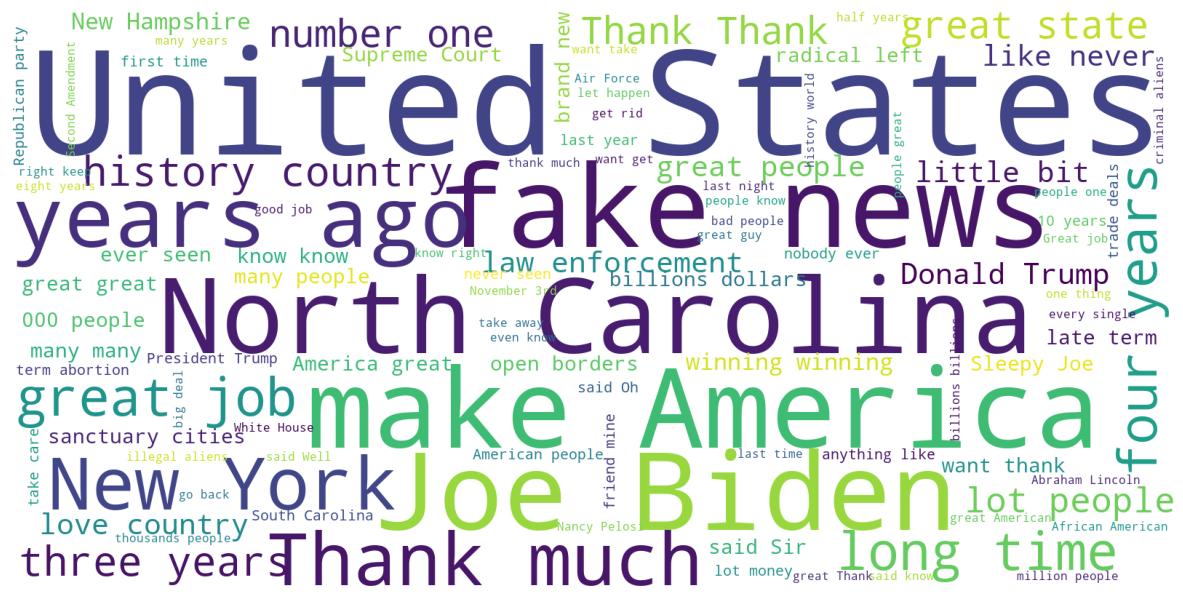

In [9]:
nwords=[]
for ngram in list(everygrams(words, 2, 2)):
    nwords.append(" ".join(ngram))

word_count_dict=Counter(nwords)
wordcloud = WordCloud(stopwords=custom_stopwords, scale=4, max_font_size=50, max_words=100,background_color="white").generate_from_frequencies(word_count_dict)

fig = plt.figure(1, figsize=(12,12))
plt.imshow(wordcloud)
plt.tight_layout(pad=0)
plt.axis("off")
plt.show()

## Most common three word sentences

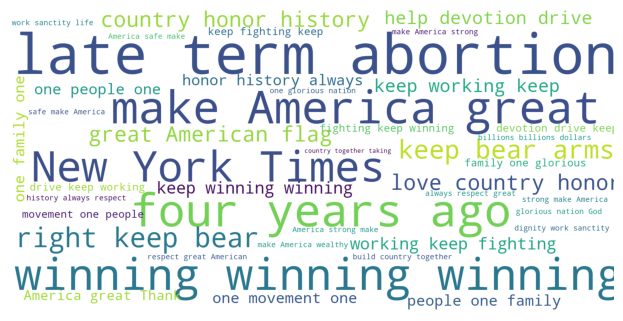

In [10]:
nwords=[]
for ngram in list(everygrams(words, 3, 3)):
    nwords.append(" ".join(ngram))

word_count_dict=Counter(nwords)
wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=100,background_color="white").generate_from_frequencies(word_count_dict)

plt.imshow(wordcloud)
plt.tight_layout(pad=0)
plt.axis("off")
plt.show()